# End-to-End Machine Leanrning Project

In this chapter you will work through an example project end to end, pretending to be a recently hired data scientist at a real estate company. Here are the main steps you will go through:
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine learning algorithms.
5. Select a model and train it
6. Fine-tune your model.
7. Present your solution
8. Launch, monitor, and maintain your system.

## Working with Real Data

When you are learning about Machine Leaning, it is best to experimentwith real-world data, not artificial datasets.

Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:
* Popular open data repositories:
    - [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
    - [Kaggle](https://www.kaggle.com/datasets) datasets
    - Amazon's [AWS](https://registry.opendata.aws/) datasets
* Meta Portals:
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](http://opendatamonitor.eu/)
    - [Quandl](http://quandl.com)

## Frame the Problem

The problem is that your model' output (a prediction of a district's median housing price) will be fed to another ML system along with many other signals*. This downstream will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

```
                                                                                                                        Other Signals
                                                                                                                            |
Upstream Components --> (District Data) --> [District Pricing prediction model](your component) --> (District prices) --> [Investment Analaysis] --> Investments
```


### Pipelines

A sequence of data processing components is called a **data pipeline**. Pipelines are very common in Machine Learning systems, since a lot of data needs to manipulated to make sure the machine learning model/algorithms understands the data, as algorithms understand only numbers.

## Download the Data:

You could use your web browser and download the data, but it is preferabble to make a function to do the same.

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Function to download the housing_data
    """
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd
import numpy as np
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()

housing = load_housing_data()

## Take a quick look at the Data Structure

Each row represents one district. There are 10 attributes:
```
longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
```

The `info()` method is useful to give a quick description of the data.

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

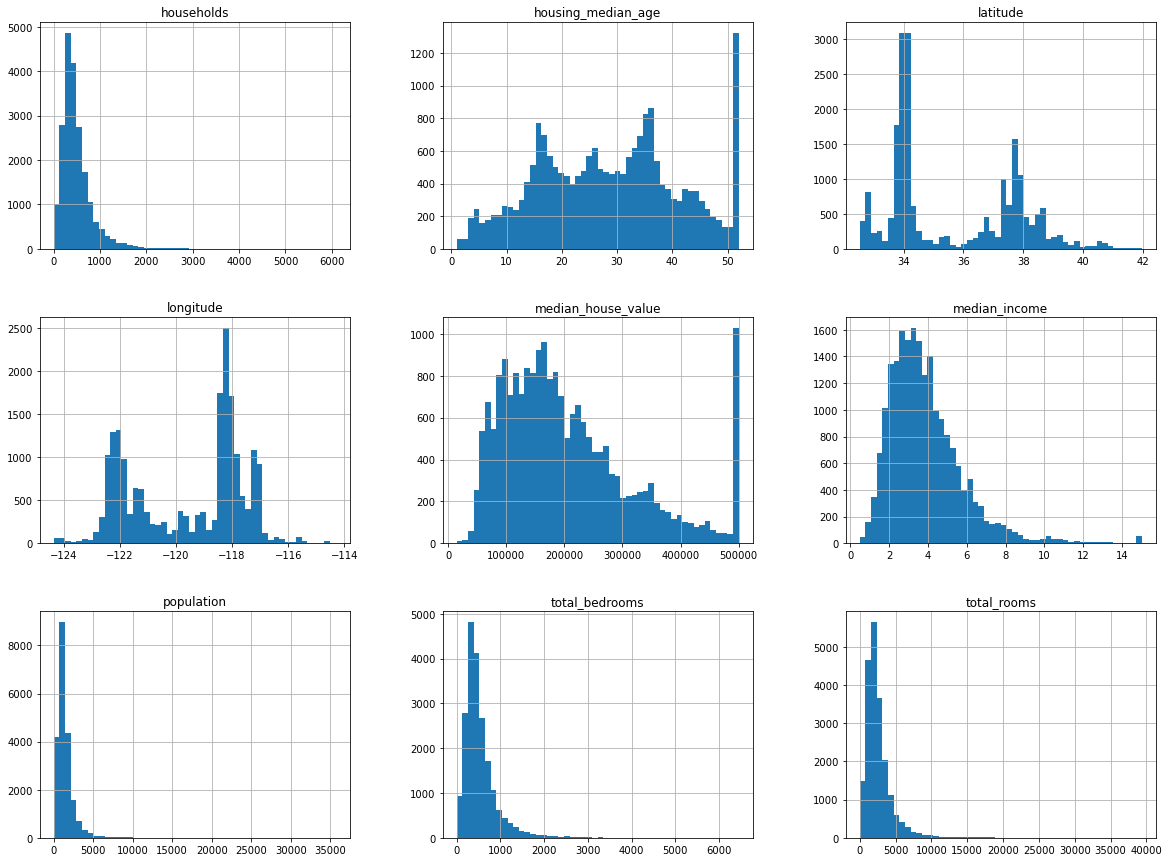

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show();

> üîë **Note:** The `hist()` method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. The simplest option is to use Jupyter's magic command `%matplotlib inline`. This tells jupyter to set up Matplotlib so that it uses Jupyter's own backend. Note that calling `plot()` is optional as Jupyter does this automatically.

#### There are few things you might notice in these histograms:

1. First the median income attribute does not look like it is expressed in US dollars (USD). The data has been scaled at 15 for higher median incomes and at 0.5 for lower median incomes. The numbers represent roughly tens of thousands of dollars(e.g., 3 actually means about $30,000). Working with oreoricessed attributes is common in Machine learning and it is not necessarily a problem. But you should try to understand how the data was computed.
2. The housing median age and the median house value were also capped.
3. These attributes have very different scales.
4. Many histograms of this dataset are *tail-heavy* i.e., they extend much farther to the right of the median than to the left. This may make it bit harder for Machine Learning Algorithms to unerstand patterns. We will try transfprming these attributes later on to have more bell shaped-distributions.

> ‚ÄºÔ∏è **Note:** Wait! Before you look at the data any further, you need to create a test set, put it aside and never look at it.

## Create a Test Set

Scikit-learn provides a few functions to split datasets into multiple subsets in various ways:

1. The `train_test_split()` function is the simplest and most used function from scikit-learn for this purpose.
2. For Stratified sampling, `StartifiedShuffleSplit()` would be useful
3. And probably so many more functions...

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_i, test_i in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_i]
    strat_test_set = housing.loc[test_i]

strat_train_set.shape

(16512, 11)

In [13]:
# Now remove the income_cat attribute so the data is back to its original state
for _ in (strat_train_set, strat_test_set):
    _.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain More Insights

So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a lttle more depth.

First, make sure you have put the test set aside and you are only exploring the training data set. In our case the set is quite small, so you can work directly on the full set. Let's create a copy so that you can play woth it without harming the training set:

In [14]:
housing = strat_train_set.copy()

### Visualizing Geopgraphical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot pf all districts to visualize the data.

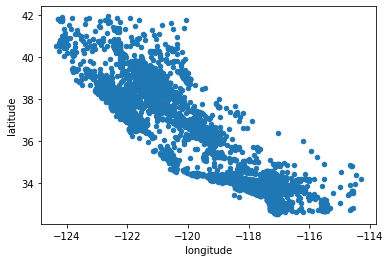

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude");

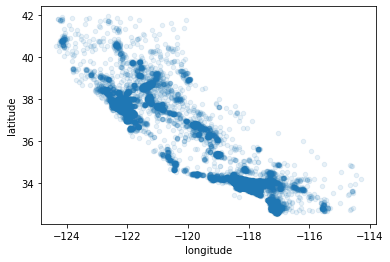

In [17]:
# Setting the alpha optin to 0.1 makes it easier to visualize the places where there is a high -density of data points.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

Now from the above graph, we can clearly see the high-density areas. Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out.

Now let's look at the housing prices. The radius of each circle represents the district's populaiton (option `s`), and the color represents the price (option `c`). We will use a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices):

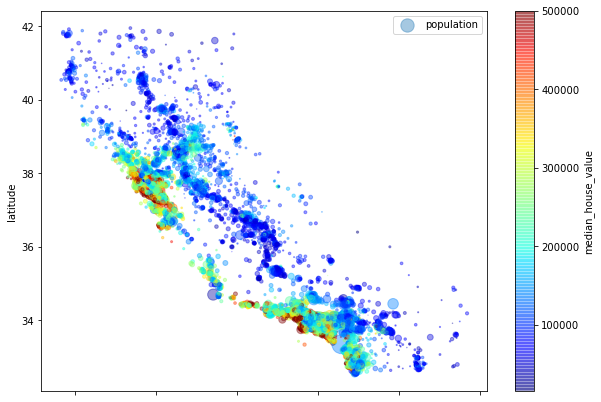

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

### Looking for Correlations

Since the dataset is not too large, you can easily compute the *standard correlation coeffecient* (also known as *Pearson's r*) between every pair of attributes using the `corr()` method

In [19]:
corr_matrix = housing.corr()

In [21]:
# Now let's look at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### The Standard Correlation Coeffecient

The correlation coeffecient ranges from -1 to 1. When it is close to 1, it means that there is strong positive correlation. While, when the coeffecient is close to -1, it means there is a strong negative correlation. Finally coeffecients close to 0 mean that there is no linear correlation.

<img src="Fig..png" alt="Standard correlation coeffecients of various Datasets"/>

> üîë **Note:** The correlation coeffecient only measures linear correlations ("if x goes up, then y generally goes up/down"). It may completely miss out on nonlinear relationships (e.g., "if x is close to 0, then y generally goes up"). Note how all the plots of the bottom row have a correlation coeffecient equal to 0, despite the fact that that their axes are clearly not independent: these examples are nonlinearly correlated.